In [17]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from keras.utils import np_utils
from keras.optimizers import Adagrad
import matplotlib.pyplot as plt

In [18]:
seed = 11
numpy.random.seed(seed)

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2]

In [20]:
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [21]:
def baseline_model():
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01),activation='relu'))
	model.add(Dense(450, kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.01), activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
	adagrad = Adagrad(lr=0.02, epsilon=None, decay=0.0)
	#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.01, nesterov=True)
	return model

In [22]:
model = baseline_model()

In [23]:
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=2)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 48s - loss: 0.9097 - acc: 0.9017 - val_loss: 0.5007 - val_acc: 0.9314
Epoch 2/50
 - 46s - loss: 0.4859 - acc: 0.9320 - val_loss: 0.4392 - val_acc: 0.9414
Epoch 3/50
 - 46s - loss: 0.4401 - acc: 0.9394 - val_loss: 0.4139 - val_acc: 0.9444
Epoch 4/50
 - 46s - loss: 0.4118 - acc: 0.9445 - val_loss: 0.3939 - val_acc: 0.9463
Epoch 5/50
 - 46s - loss: 0.3919 - acc: 0.9469 - val_loss: 0.3844 - val_acc: 0.9475
Epoch 6/50
 - 46s - loss: 0.3765 - acc: 0.9499 - val_loss: 0.3593 - val_acc: 0.9527
Epoch 7/50
 - 46s - loss: 0.3642 - acc: 0.9527 - val_loss: 0.3512 - val_acc: 0.9546
Epoch 8/50
 - 46s - loss: 0.3540 - acc: 0.9548 - val_loss: 0.3415 - val_acc: 0.9538
Epoch 9/50
 - 48s - loss: 0.3452 - acc: 0.9559 - val_loss: 0.3314 - val_acc: 0.9578
Epoch 10/50
 - 47s - loss: 0.3377 - acc: 0.9574 - val_loss: 0.3246 - val_acc: 0.9600
Epoch 11/50
 - 46s - loss: 0.3308 - acc: 0.9582 - val_loss: 0.3275 - val_acc: 0.9585
Epoch 12/50
 - 46s - los

In [24]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Test accuracy: %.2f%%" % (scores[1]*100))

Baseline Error: 3.01%
Test accuracy: 96.99%


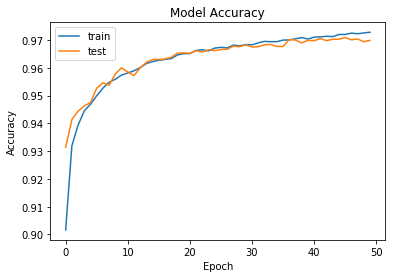

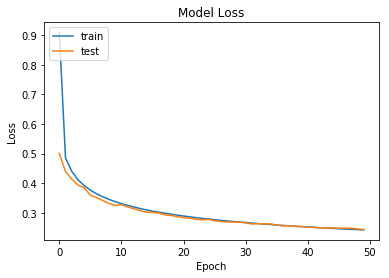

In [25]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_5 (Dense)              (None, 450)               353250    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                4510      
Total params: 973,200
Trainable params: 973,200
Non-trainable params: 0
_________________________________________________________________
